# Derivatives

This notebook includes some exercises to calculate derivates numerically and symbolically in Python. Prepared for EAS Practical Coding and Math course at Georgia Tech.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

## Numerical derivative

First lets define a function $$y = e^{-x} \sin(x^2)$$ which is annoying, but not impossible, to analytically differentiate

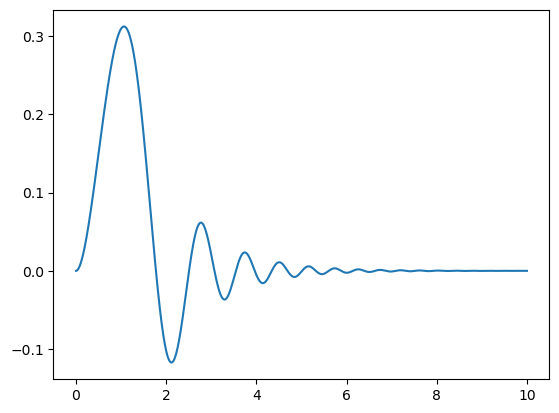

In [17]:
x = np.linspace(0,10,1000)
y = np.exp(-x)*np.sin(x**2)
plt.plot(x,y)

Probably the most obvious way to calculate the derivative is using diff, which calculates the running difference of order n (i.e. order of the derivative)

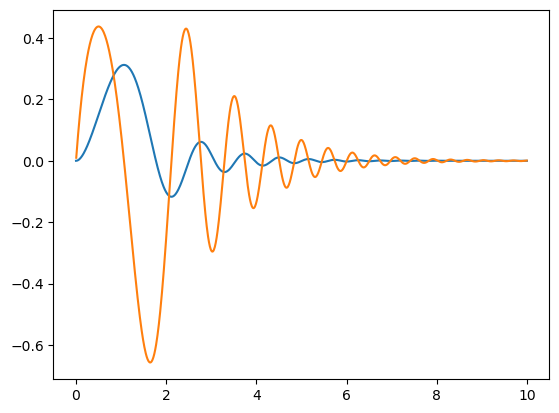

In [18]:
dydx = np.diff(y,1)/np.diff(x,1)
plt.plot(x,y)

xmid = (x[0:-1]+x[1:])/2 #xmid is the midpoint value of x on each interval
plt.plot(xmid,dydx) #note that we need to modify x which has one more element than dydx

We can also take the second-order derivative: $$\frac{d^2 y}{dx^2}$$ this way

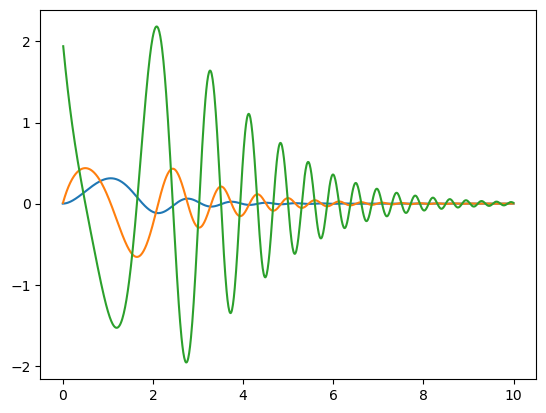

In [19]:
d2ydx2 = np.diff(y,2)/(np.diff(xmid,1)**2)
plt.plot(x,y)
plt.plot((x[0:-1]+x[1:])/2,dydx)
plt.plot(x[1:-1],d2ydx2) #note that we need to modify x which has one more element than dydx

Uh oh. Gradient does the job much more effectively (and using a second-order stencil)

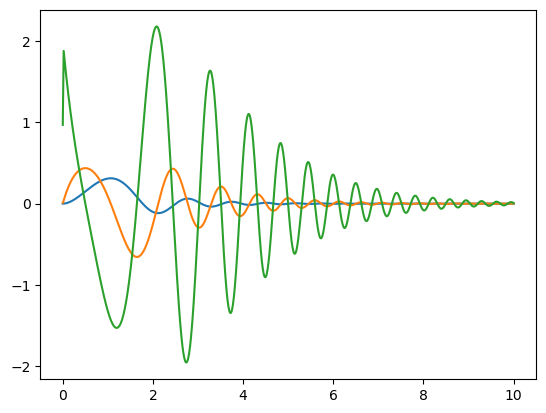

In [20]:
dydx = np.gradient(y, x)
d2ydx2 = np.gradient(np.gradient(y, x),x)
plt.plot(x,y)
plt.plot(x,dydx)
plt.plot(x,d2ydx2)

## Symbolic Derivatives

To use SymPy, you first must define which variables are "symbols"

In [21]:
x = symbols("x")

Then you can write functions as you would with numerical values in Python

In [23]:
y = exp(-x) * sin(x**2)
y

exp(-x)*sin(x**2)

And use the plotting functionality in SymPy

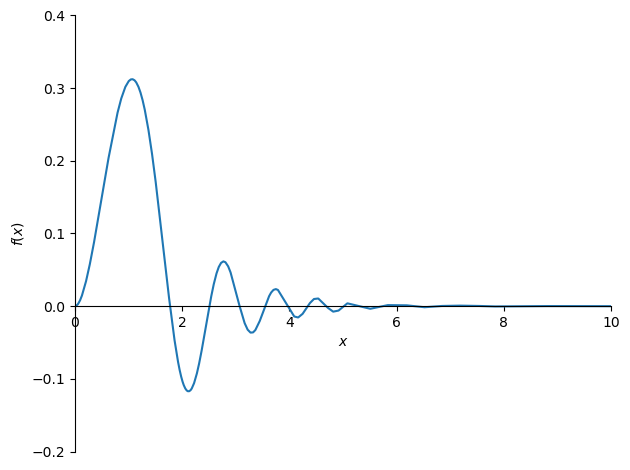

In [24]:
from sympy.plotting import plot
plot(y,xlim=(0,10),ylim=(-0.2,0.4))

In [25]:
dydx = diff(y)
dydx

2*x*exp(-x)*cos(x**2) - exp(-x)*sin(x**2)

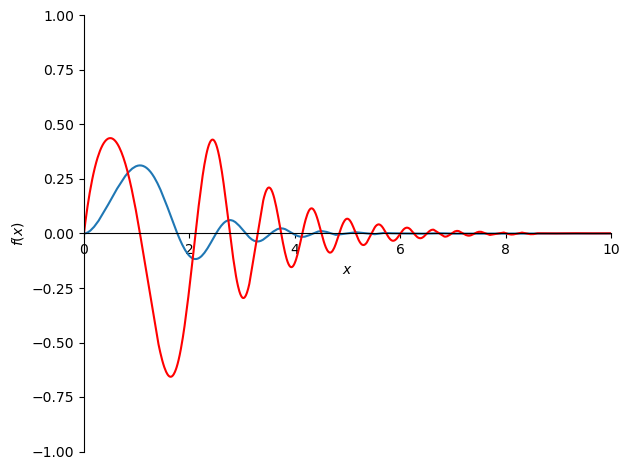

In [26]:
p1=plot(y,xlim=(0,10),ylim=(-1,1),show=False)
p2=plot(dydx,xlim=(0,10),ylim=(-1,1),show=False,line_color="red")
p1.append(p2[0]) #you have to append plots to each other like this in SymPy
p1.show()